<a href="https://colab.research.google.com/github/JoshOlu/data602/blob/main/clustering2hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()
#upload Tissue Data

Saving Ch12Ex13.csv to Ch12Ex13 (1).csv


In [3]:
#13 A
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


tissue_data = pd.read_csv("Ch12Ex13.csv", header=None)
tissue_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


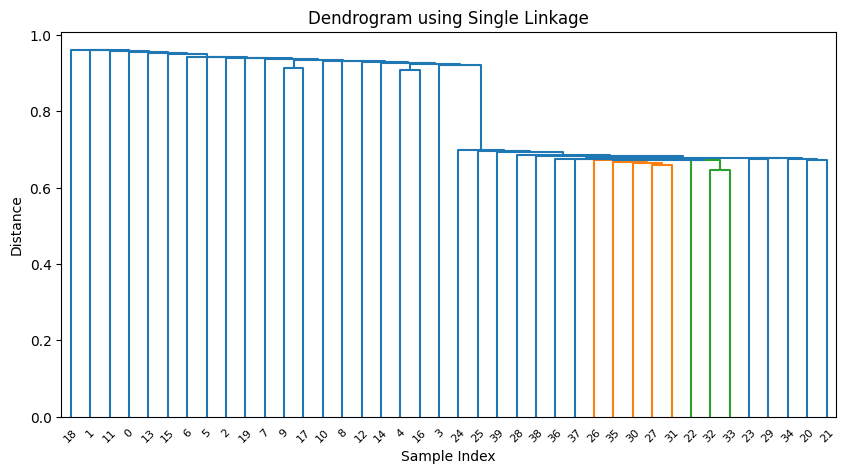

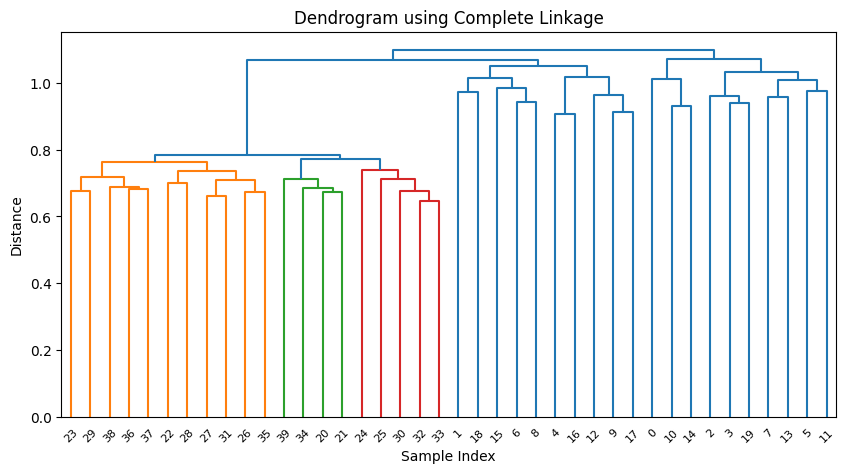

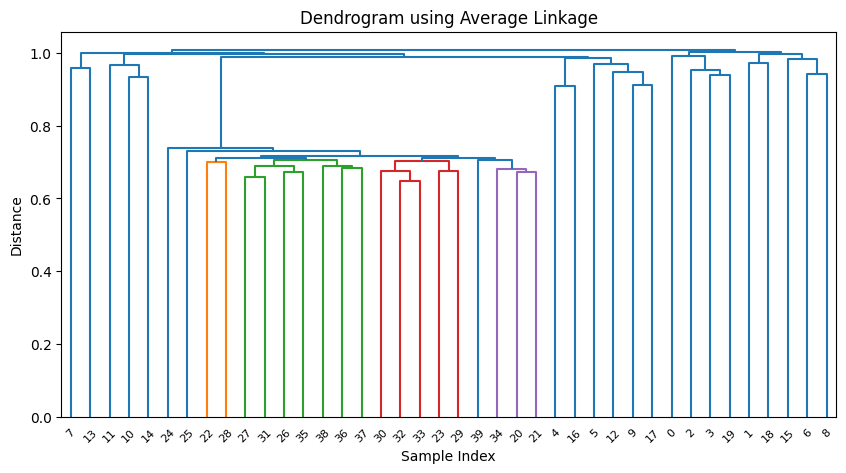

In [4]:
#13 B
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

dist_corr = pdist(tissue_data.T, metric='correlation')

linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    dendrogram = sch.dendrogram(sch.linkage(dist_corr, method=method))
    plt.title(f"Dendrogram using {method.capitalize()} Linkage")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()


The genes seem to separate 2 of the 3 linkage types into two groups: Complete Linkage and Average Linkage. It seems that Single Linkage is not effectively separating the groups within the dataset.

Complete Linkage seems to be the most effective when separating the groups within the dataset. You can clearly see the two different clusters with slight overlap.

Average Linking seems to be separating the groups within the dataset, but not as effective as Complete Linkage. It has more overlap.

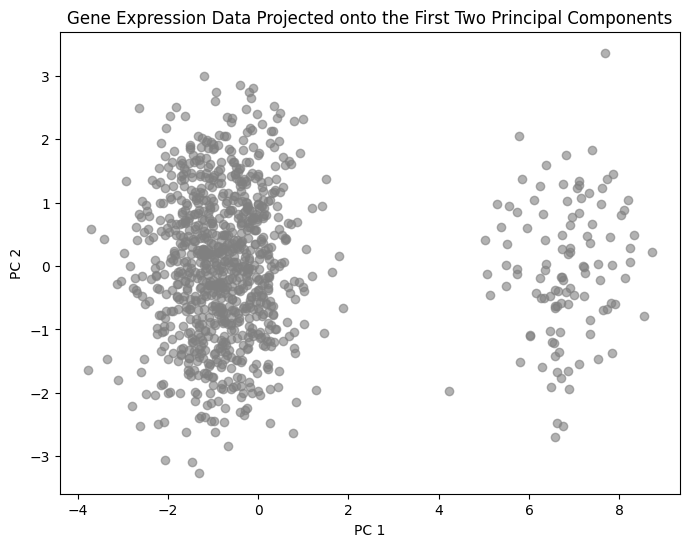

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tissue_data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='gray', alpha=0.6)
plt.title("Gene Expression Data Projected onto the First Two Principal Components")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

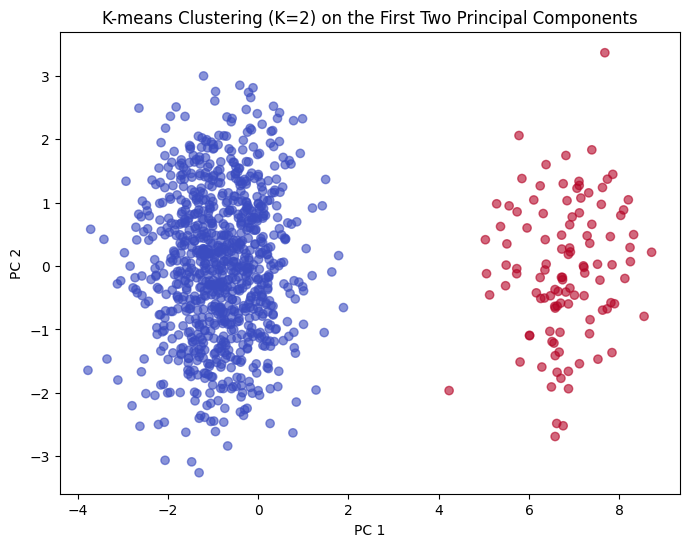

Silhouette Score: 0.7684


In [6]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_pca)
cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.6)
plt.title("K-means Clustering (K=2) on the First Two Principal Components")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

silhouette_avg = silhouette_score(data_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Based on the silhouette score of the first two principal components, the data is divided into two clusters very well. The silhouette score is a 0.7684, which is pretty close to 1. Looking at the clusters, it is very easy to spot the separaton. This indicates that running PCA on the data did pretty well with separating the two groups.